#Practica 4: Suavizamiento de series de tiempo

Aplicar suavizamiento de las series de tiempo.
Dataset usado: Car_sales-Car_Data.csv
Un dataset que muestra un conjunto de datos de venta de diversos vehiculos usados por diferentes consecionarias, este incluye informacion sobre el comprador,  motor, automovil, marca, transmision, dueños previos y demas datos del vehiculo.

## Importado de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Subida de dataset y descripcion del mismo

In [9]:
archivo = 'Car Sales.xlsx - car_data.csv'
df = pd.read_csv(archivo)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


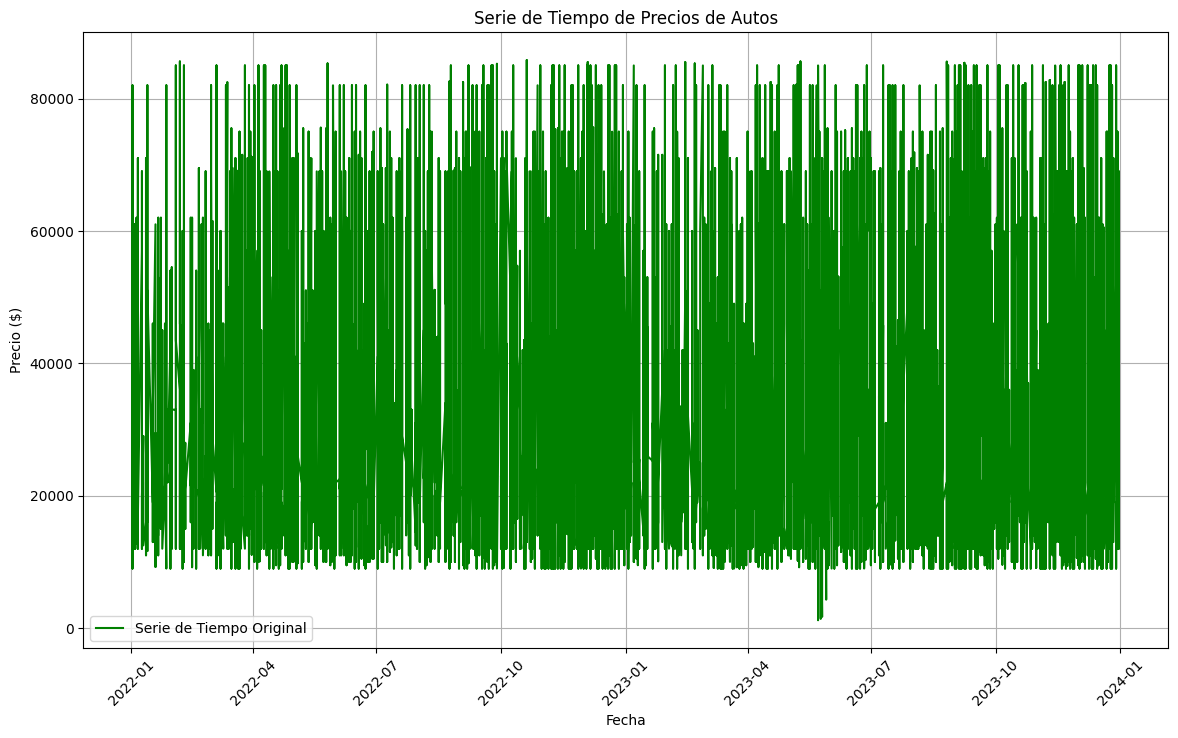

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Price ($)'], label='Serie de Tiempo Original', color='green')
plt.title('Serie de Tiempo de Precios de Autos')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Aplicacion Técnicas de suavizamiento

In [15]:
def moving_average(df, window_size):
    return df['Price ($)'].rolling(window=window_size).mean()

def weighted_moving_average(df, window_size, weights=None):
    if weights is None:
        weights = np.arange(1, window_size + 1)
    return df['Price ($)'].rolling(window=window_size).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

def exponential_smoothing(df, alpha=0.1):
    return df['Price ($)'].ewm(alpha=alpha, adjust=False).mean()

def decomposition_smoothing(df):
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(df['Price ($)'], model='additive', period=12)
    return result.trend

In [16]:
df['Simple_MA'] = moving_average(df, window_size=5)
df['Weighted_MA'] = weighted_moving_average(df, window_size=5)
df['Exp_Smoothing'] = exponential_smoothing(df, alpha=0.2)
df['Decomposition'] = decomposition_smoothing(df)

### Graficamos los suavizamientos

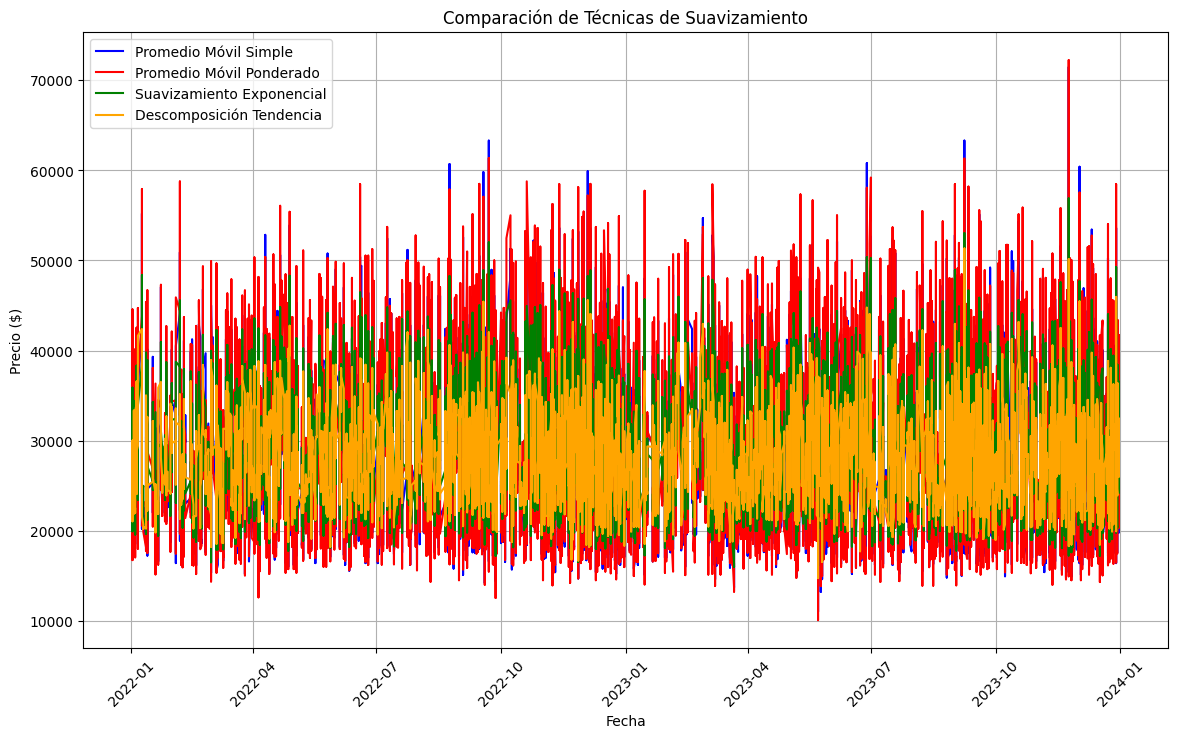

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Simple_MA'], label='Promedio Móvil Simple', color='blue')
plt.plot(df['Date'], df['Weighted_MA'], label='Promedio Móvil Ponderado', color='red')
plt.plot(df['Date'], df['Exp_Smoothing'], label='Suavizamiento Exponencial', color='green')
plt.plot(df['Date'], df['Decomposition'], label='Descomposición Tendencia', color='orange')
plt.title('Comparación de Técnicas de Suavizamiento')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()